In [5]:
import numpy as np
from files.algo import lm_NFLP
import matplotlib.pyplot as plt
from files.thresh import threshold

In [2]:
threshold(0.99999999999)

7.161109493909237

In [3]:
np.random.seed(613)

In [4]:
X = np.linspace(0, 10, 100)
y = 3 + 0.5 * X + np.random.normal(0, 1, 100)

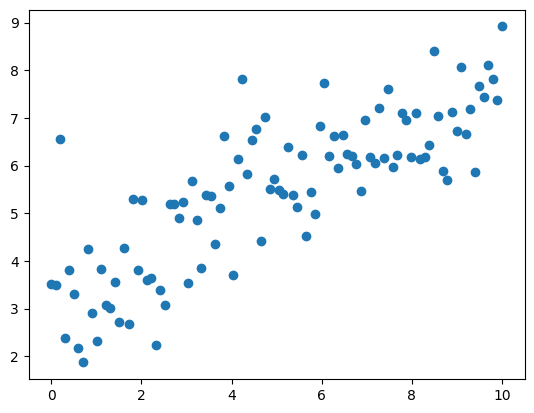

In [5]:
plt.scatter(X.flatten(), y.flatten())
plt.show()

In [6]:
X_design = np.c_[np.ones(X.shape[0]), X]

In [7]:
beta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
intercept_hat, slope_hat = beta_hat

In [8]:
print(f"Estimated intercept: {intercept_hat:.4f}")
print(f"Estimated slope: {slope_hat:.4f}")

Estimated intercept: 3.2317
Estimated slope: 0.4492


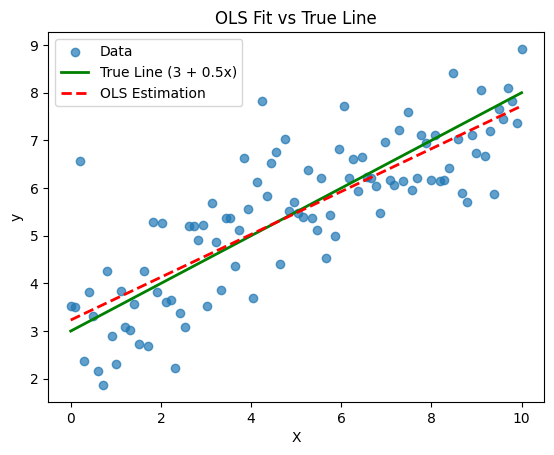

In [9]:
# plt.figure(dpi=200)
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, intercept_hat + slope_hat * X, label="OLS Estimation", color='red', linestyle='--', linewidth=2)
plt.legend()
plt.title("OLS Fit vs True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
reg_result = lm_NFLP(y, X_design, intercept=False)
beta_NFLP = reg_result['beta']

In [11]:
print("\nRobust regression estimates:")
print("omega =", reg_result['omega'])
print("beta =", beta_NFLP)
print("sigma =", reg_result['sigma'])


Robust regression estimates:
omega = 0.9856836696339981
beta = [3.09321559 0.46788061]
sigma = 0.868482463402302


In [12]:
# beta_NFLP @ X_design.T

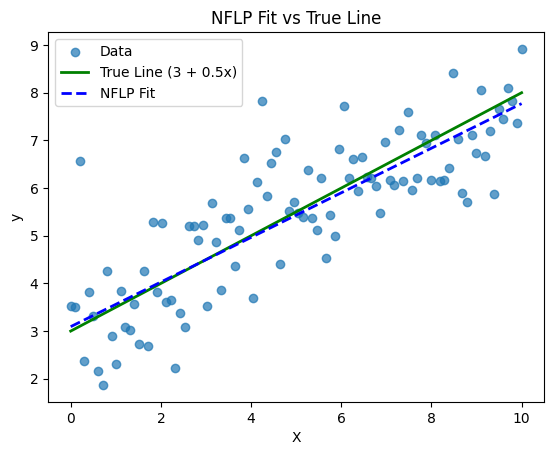

In [13]:
# plt.figure(dpi=200)
plt.scatter(X, y.flatten(), label="Data", alpha=0.7)
plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, beta_NFLP[0] + beta_NFLP[1] * X, label="NFLP Fit", color='blue', linestyle='--', linewidth=2)
# plt.plot(X, intercept_hat + slope_hat * X, label="Fitted Line", color='red', linestyle='--', linewidth=2)
plt.legend()
plt.title("NFLP Fit vs True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

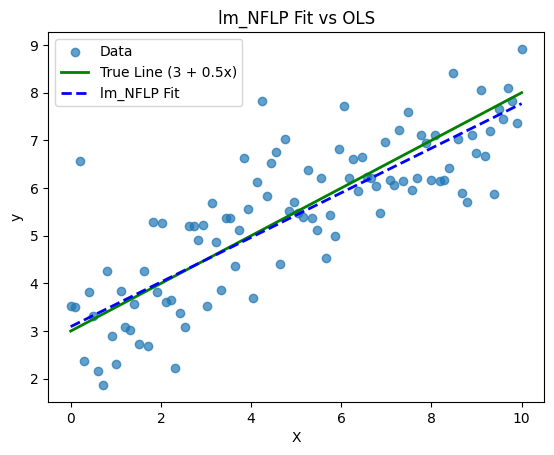

In [14]:
# plt.figure(dpi=200)
plt.scatter(X, y.flatten(), label="Data", alpha=0.7)
plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, beta_NFLP[0] + beta_NFLP[1] * X, label="lm_NFLP Fit", color='blue', linestyle='--', linewidth=2)
# plt.plot(X, intercept_hat + slope_hat * X, label="OLS Line", color='red', linestyle='--', linewidth=2)
plt.legend()
plt.title("lm_NFLP Fit vs OLS")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

ADDING OUTLIERS

In [15]:
y[[11, 12, 9, 2, 5, 23, 34]] += 10
y[[74, 63 ,89, 91, 93, 99, 88]] -= 10

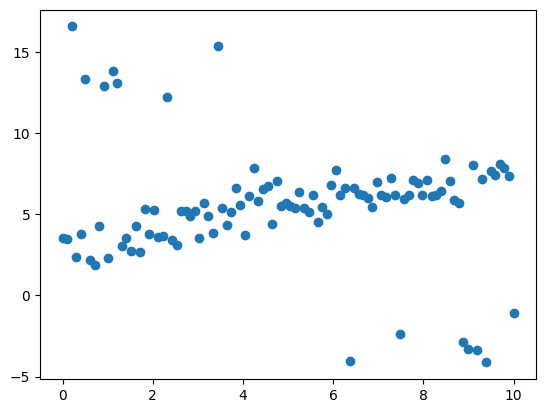

In [16]:
plt.scatter(X.flatten(), y.flatten())
plt.show()

Estimated intercept: 6.2079
Estimated slope: -0.1460


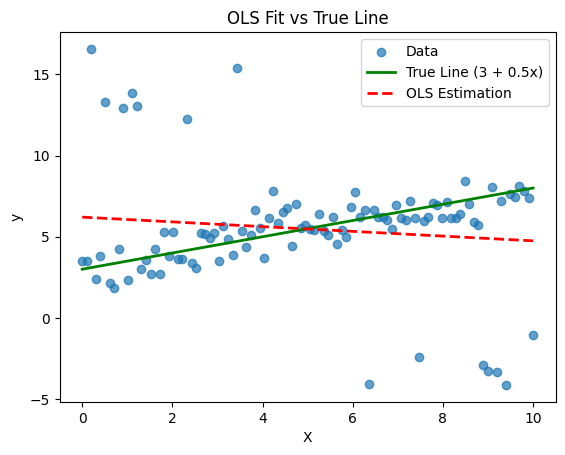

In [17]:
# plt.figure(dpi=200)
beta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
intercept_hat, slope_hat = beta_hat
print(f"Estimated intercept: {intercept_hat:.4f}")
print(f"Estimated slope: {slope_hat:.4f}")
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, intercept_hat + slope_hat * X, label="OLS Estimation", color='red', linestyle='--', linewidth=2)
plt.legend()
plt.title("OLS Fit vs True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


Robust regression estimates:
omega = 0.8501901145652121
beta = [3.12350096 0.46611184]
sigma = 0.8359693832452045


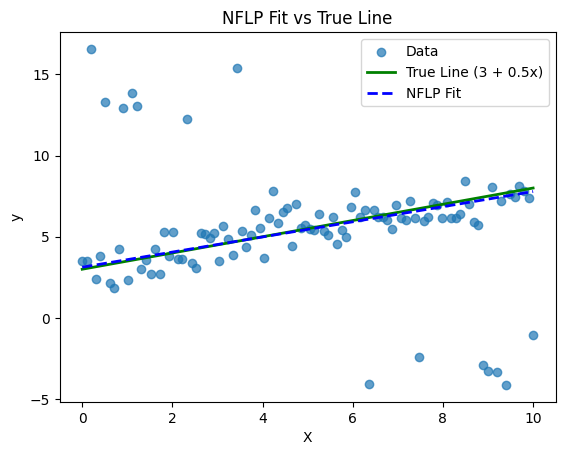

In [18]:
# plt.figure(dpi=200)
reg_result = lm_NFLP(y, X_design, intercept=False)
beta_NFLP = reg_result['beta']
print("\nRobust regression estimates:")
print("omega =", reg_result['omega'])
print("beta =", beta_NFLP)
print("sigma =", reg_result['sigma'])
beta_NFLP.shape, X_design.shape
plt.scatter(X, y.flatten(), label="Data", alpha=0.7)
plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, beta_NFLP[0] + beta_NFLP[1] * X, label="NFLP Fit", color='blue', linestyle='--', linewidth=2)
plt.legend()
plt.title("NFLP Fit vs True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

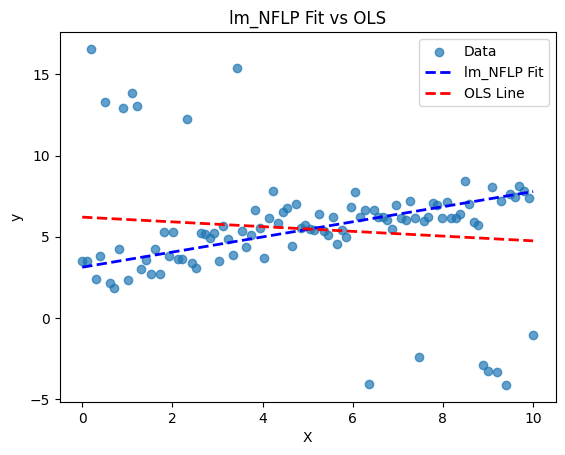

In [19]:
# plt.figure(dpi=200)

plt.scatter(X, y.flatten(), label="Data", alpha=0.7)
# plt.plot(X, 3 + 0.5 * X, label="True Line (3 + 0.5x)", color='green', linewidth=2)
plt.plot(X, beta_NFLP[0] + beta_NFLP[1] * X, label="lm_NFLP Fit", color='blue', linestyle='--', linewidth=2)
plt.plot(X, intercept_hat + slope_hat * X, label="OLS Line", color='red', linestyle='--', linewidth=2)
plt.legend()
plt.title("lm_NFLP Fit vs OLS")
plt.xlabel("X")
plt.ylabel("y")
plt.show()